<a href="https://colab.research.google.com/github/Taj1920/zomato_data_analysis_task/blob/main/Zomato_Restaurant_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato Restaurant Data analysis

**Objective:**

To perform Exploratory Data Analysis (EDA) on the Zomato Bangalore dataset and generate
meaningful business insights using Python.

In [227]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
#load the dataset
df = pd.read_excel("/content/zomato_rest_data.xlsx")

# Task 1: Data Understanding & Cleaning

**1. Dataset Exploration**

In [229]:
# Display first 5 rows
df.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [230]:
# Display shape of dataset (rows and columns)
df.shape

(51717, 18)

In [231]:
# List column names
df.columns

Index(['Unnamed: 0', 'url', 'address', 'name', 'online_order', 'book_table',
       'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [232]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [233]:
# Identify missing values
df.isnull().sum()

,0
Unnamed: 0,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21


**2. Data Cleaning**

In [234]:
#Removing unwanted columns
cols = ["Unnamed: 0","url","address","phone","reviews_list","menu_item","location","rest_type"]
df = df.drop(cols,axis=1)
df.head()

,name,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [235]:
#converting name column into capitalize case (Normalization)
df["name"] = df["name"].str.capitalize()
df["name"].unique()

array(['Jalsa', 'Spice elephant', 'San churro cafe', ..., 'Nawabs empire',
       'Seeya restaurant',
       'Plunge - sheraton grand bengaluru whitefield hotel &...'],
      dtype=object)

In [236]:
#cleaning rate column
#i)remove unwanted data "/5"
df["rate"] = df["rate"].str.strip("/5")
#ii)Replace inconsistent values like "NEW" and "-" with Nan
df["rate"] = df["rate"].replace("NEW",np.nan)
df["rate"] = df["rate"].replace("-",np.nan)
#iii) Convert into float data type
df["rate"] = df["rate"].astype(float)
avg_rate = round(df["rate"].mean())
#iv) Fill missing values with avg rate
df["rate"] = df["rate"].fillna(avg_rate)
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 2.6, 3.4, 2. , 2.7, 4.7, 2.4, 2.2, 2.3, 4.8, 3.5,
       2.5, 4.5, 4.9, 2.1, 1.8])

In [237]:
#Handling nan values in dish_liked column
freq_liked_dish = df["dish_liked"].mode()[0]
df["dish_liked"] = df["dish_liked"].fillna(freq_liked_dish)

In [238]:
#Handling nan values in cuisines
freq_cuisine = df["cuisines"].mode()[0]
df["cuisines"] = df["cuisines"].fillna(freq_cuisine)

In [239]:
#Handling approx_cost(for two people) column
#i) rename the column
df.rename(columns={"approx_cost(for two people)":"cost_for_2"},inplace=True)
#ii)replace "," with ""
df["cost_for_2"] = df["cost_for_2"].str.replace(",","")
#iii)convert into numerical datatype
df["cost_for_2"]=df["cost_for_2"].astype(float)
df["cost_for_2"].unique()
#iv) handle nan values
avg = round(df["cost_for_2"].mean())
df["cost_for_2"] = df["cost_for_2"].fillna(avg)

In [240]:
#rename listed_in(type) to rest_type
df.rename(columns={"listed_in(type)":"rest_type"},inplace=True)

In [241]:
#rename listed_in(city) to location
df.rename(columns={"listed_in(city)":"location"},inplace=True)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          51717 non-null  float64
 4   votes         51717 non-null  int64  
 5   dish_liked    51717 non-null  object 
 6   cuisines      51717 non-null  object 
 7   cost_for_2    51717 non-null  float64
 8   rest_type     51717 non-null  object 
 9   location      51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


# Task 2: Univariate Analysis

**1. Top 5 locations with highest number of restaurants**

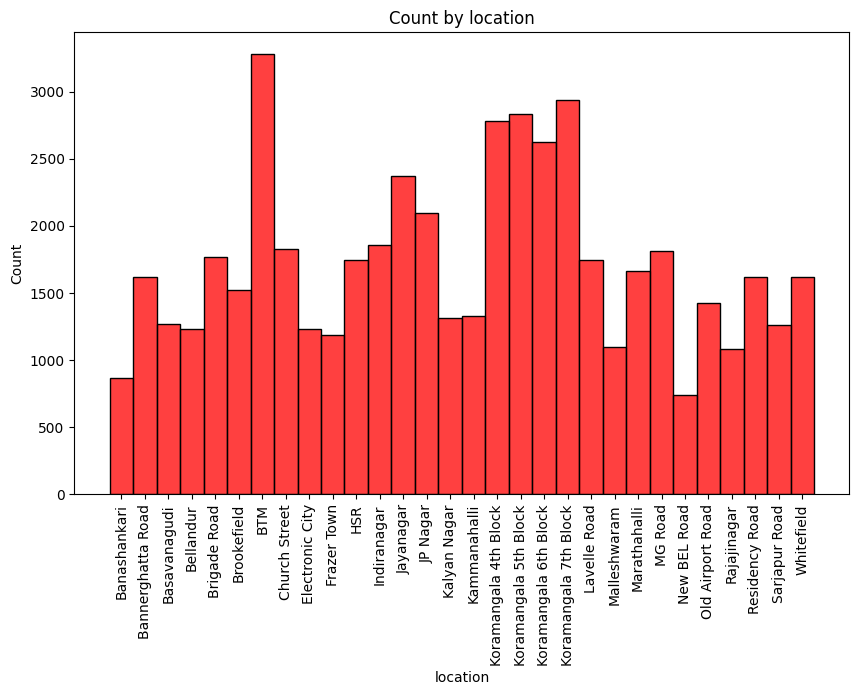

In [243]:
plt.figure(figsize=(10,6))
sns.histplot(x="location",data=df,color="red")
plt.xticks(rotation=90)
plt.title("Count by location")
plt.show()

**Restaurants are more in BTM, Koramangla 4th,5th,6th and 7th blocks compared to other locations**

**2. Distribution of restaurant ratings**

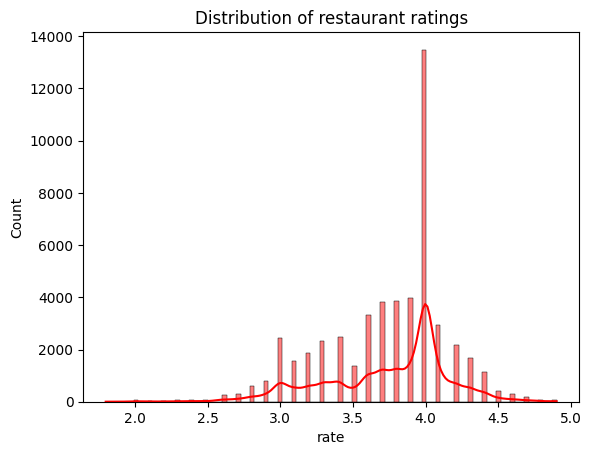

In [247]:
sns.histplot(x="rate",data=df,color="red",kde=True)
plt.title("Distribution of restaurant ratings")
plt.show()

**Most of the restaurants are rated as 4/5.**

**3. Percentage of restaurants offering online orders**

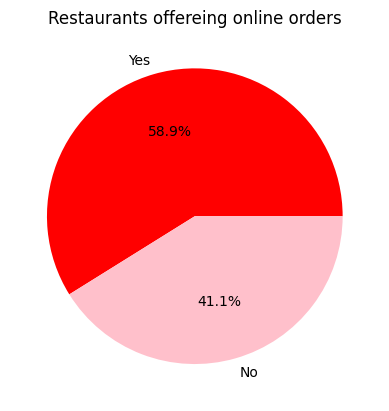

In [245]:
data = pd.DataFrame(df["online_order"].value_counts()).reset_index()
plt.pie(data["count"],labels=data["online_order"],autopct="%0.1f%%",colors=["red","pink"])
plt.title("Restaurants offereing online orders")
plt.show()

**Around 58.9% of the restaurants are offering online orders.**

**4. Distribution of average cost for two**

Text(0.5, 1.0, 'Distribution of average cost for 2')

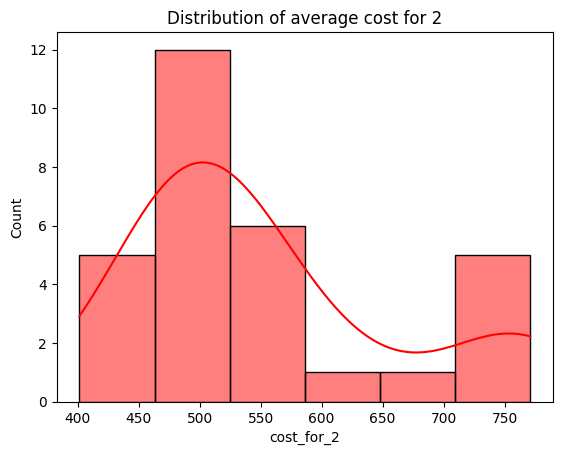

In [246]:
data = df.groupby("location")["cost_for_2"].mean()
data = pd.DataFrame(data).reset_index()
sns.histplot(x="cost_for_2",data=data,kde=True,color="red")
plt.title("Distribution of average cost for 2")

**On an average most of the restaurants are charging from 450 to 550 Rs. for two people.**

# Task 3: Bivariate Analysis

**1) Rating vs Cost**

Text(0.5, 1.0, 'Rating vs Cost')

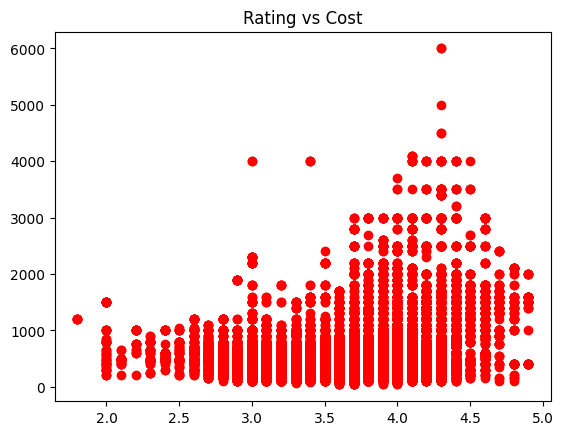

In [256]:
plt.scatter(df["rate"],df["cost_for_2"],color="red")
plt.title("Rating vs Cost")

**Customers who rated more has spent more.**

**2) Rating vs Online Order**

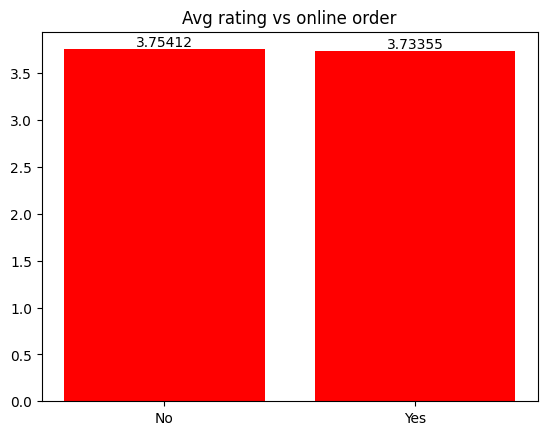

In [263]:
data = df.groupby("online_order")["rate"].mean()
data = pd.DataFrame(data).reset_index()
fig = plt.bar(data["online_order"],data["rate"],color="red")
plt.bar_label(fig)
plt.title("Avg rating vs online order")
plt.show()

**Customers are equally liking the restaurants with or without online order facility.**

**3) Votes vs Rating**

<Axes: >

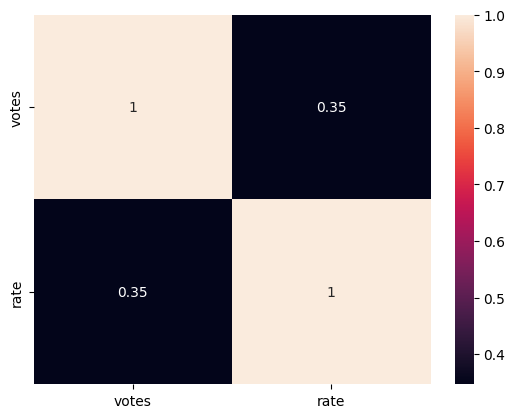

In [271]:
data = df[["votes","rate"]].corr()
sns.heatmap(data,annot=True)

**No strong relation b/w votes and rating**

# **Task 4: Business Insights & Recommendations**

**1. Does higher cost lead to higher ratings?**

    Yes higher cost leads to higher rating

**2. Does offering online order impact ratings?**

    No customers are equally liking the restaurants with or without online order facility.

**3. Which location appears highly competitive?**
   
    BTM is having more restaurants

**4. Where would you recommend opening a new restaurant?**
   
    Banshankari, New BEL Road where there is no much competition.

In [273]:
#save cleaned data
df.to_csv("cleaned_data.csv")